In [1]:
# Step 1 - Load Data
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Welcome\Desktop\Vehicle Prediction\Accident.csv')
print(dataset.shape)


(500, 24)


In [2]:
X = dataset.iloc[:,15:23].values
y = dataset.iloc[:, 23].values
print(X.shape)
print(y.shape)

(500, 8)
(500,)


In [3]:
# Step 2 - Convert Gender to number
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

# Optional - if you want to convert X to float data type
import numpy as np
X = np.vstack(X[:, :]).astype(np.float)

In [4]:

# Step 3 - Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [5]:

# Step 4 - Fit Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle
model = RandomForestClassifier(verbose=1)

parameters = {
    'n_estimators': [10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'auto', 'log2', None],
    'class_weight': ['balanced', None],
}

scorer = make_scorer(score_func=accuracy_score)
grid_obj = GridSearchCV(model, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

model = grid_fit.best_estimator_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

In [6]:
# Step 5 - Predict
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [7]:
baseline = np.linspace(int(round(y_test.mean())), int(round(y_test.mean())), len(y_test))

In [8]:
y_pred_int = pd.Series(y_pred).apply(lambda x: int(round(x)))

In [9]:

# Step 6 - Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

print('Model Mean Absolute Error: ', mean_absolute_error(y_pred_int, y_test))
print('Baseline Mean Absolute Error: ', mean_absolute_error(baseline, y_test))
print('Accuracy Score: ', accuracy_score(y_pred_int, y_test))

Model Mean Absolute Error:  0.096
Baseline Mean Absolute Error:  0.312
Accuracy Score:  0.936


In [10]:

# Step 6 - Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)


[[31  0  1]
 [ 1 84  1]
 [ 3  2  2]]


In [11]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.98      0.98      0.98        86
           2       0.50      0.29      0.36         7

    accuracy                           0.94       125
   macro avg       0.79      0.74      0.76       125
weighted avg       0.93      0.94      0.93       125



(0, 5)

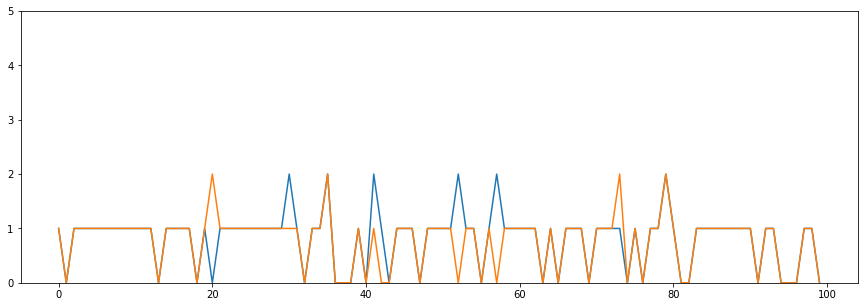

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

num=150
plt.plot(np.arange(100),y_test[num-125:num])
plt.plot(np.arange(100), y_pred_int[num-125:num])
plt.ylim(0,5)

In [35]:
feature_imp=pd.Series(model.feature_importances_).sort_values(ascending=False)
print(feature_imp[:10])

2    0.609288
0    0.130990
1    0.114291
7    0.055473
5    0.034290
6    0.028516
3    0.017176
4    0.009976
dtype: float64


No handles with labels found to put in legend.


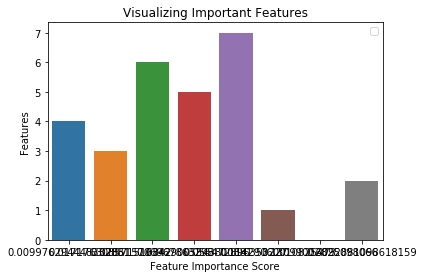

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp[:10].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()